In [1]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets

### Load datasets

In [2]:
matches = pd.read_csv('matches/WorldCupMatches.csv')
players = pd.read_csv('matches/WorldCupPlayers.csv')
cups = pd.read_csv('matches/WorldCups.csv')
players_15 = pd.read_csv('players/players_15.csv')
players_16 = pd.read_csv('players/players_16.csv')
players_17 = pd.read_csv('players/players_17.csv')
players_18 = pd.read_csv('players/players_18.csv')
players_19 = pd.read_csv('players/players_19.csv')
players_20 = pd.read_csv('players/players_20.csv')
players_21 = pd.read_csv('players/players_21.csv')
players_22 = pd.read_csv('players/players_22.csv')

/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_1683/920988308.py:4: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  players_15 = pd.read_csv('players/players_15.csv')
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_1683/920988308.py:5: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  players_16 = pd.read_csv('players/players_16.csv')
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_1683/920988308.py:7: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  players_18 = pd.read_csv('players/players_18.csv')
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_1683/920988308.py:11: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22 = pd.read_csv('players/players_22.csv')


### Explore the matches dataset 

In [3]:
matches.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [4]:
matches.shape # 20 variables and 4572 entries 

(4572, 20)

In [5]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


### Explore the players dataset 

In [6]:
players.head(10)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [7]:
players.tail()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN
37783,255959,300186501,ARG,SABELLA Alejandro (ARG),N,23,BASANTA,NaN,NaN


In [8]:
players.shape

(37784, 9)

### Explore the cups dataset

In [9]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [10]:
cups.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [11]:
cups.shape

(20, 10)

In [12]:
cups[cups['Winner'] == 'Germany FR'] = 'Germany'

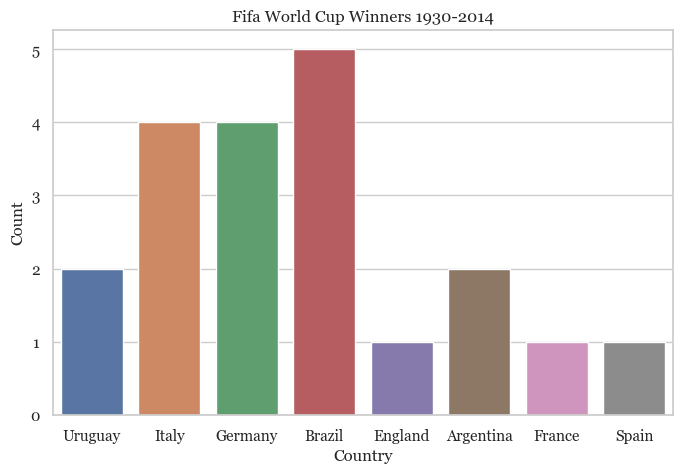

In [13]:
sns.set_theme(style='whitegrid', font='georgia')
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=cups, x='Winner')
ax.set_title('Fifa World Cup Winners 1930-2014')
ax.set_xlabel('Country')
ax.set_ylabel('Count'); 

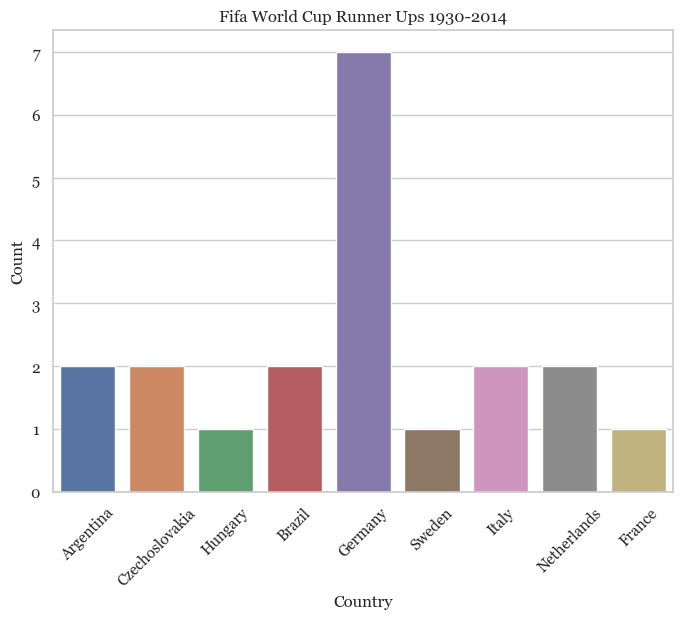

In [14]:
cups[cups['Runners-Up'] == 'Germany FR'] = 'Germany'
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=cups, x='Runners-Up')
ax.set_title('Fifa World Cup Runner Ups 1930-2014')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.xticks(rotation=45); 

In [16]:
players_22.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [18]:
players_22.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,...,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


In [20]:
players_22.shape

(19239, 110)